In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [8]:
import pandas as pd

# Correct URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data"

# Define column names as per the dataset description
columns = ["Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", "SED-E", "COND-E",
           "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P",
           "PH-D", "DBO-D", "SS-D", "SSV-D", "SED-D", "COND-D"]

# Read dataset with proper delimiter and handling missing values
data = pd.read_csv(url, delimiter='\\s+', names=columns, na_values="?")

# Display the first few rows
print(data.head())



                                                 Q-E  ZN-E  PH-E  DBO-E  \
0  D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,211...   NaN   NaN    NaN   
1  D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,266...   NaN   NaN    NaN   
2  D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,166...   NaN   NaN    NaN   
3  D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2...   NaN   NaN    NaN   
4  D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2...   NaN   NaN    NaN   

   DQO-E  SS-E  SSV-E  SED-E  COND-E  PH-P  ...  SS-P  SSV-P  SED-P  COND-P  \
0    NaN   NaN    NaN    NaN     NaN   NaN  ...   NaN    NaN    NaN     NaN   
1    NaN   NaN    NaN    NaN     NaN   NaN  ...   NaN    NaN    NaN     NaN   
2    NaN   NaN    NaN    NaN     NaN   NaN  ...   NaN    NaN    NaN     NaN   
3    NaN   NaN    NaN    NaN     NaN   NaN  ...   NaN    NaN    NaN     NaN   
4    NaN   NaN    NaN    NaN     NaN   NaN  ...   NaN    NaN    NaN     NaN   

   PH-D  DBO-D  SS-D  SSV-D  SED-D  COND-D  
0   NaN    NaN   NaN    NaN  

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data"

# Read the dataset (first column seems to be a date, so we'll handle it separately)
data = pd.read_csv(url, delimiter=',', header=None)

# Drop the first column (it contains non-numeric values like dates)
data = data.iloc[:, 1:]

# Convert non-numeric values to NaN
data.replace("?", np.nan, inplace=True)

# Convert all columns to numeric
data = data.apply(pd.to_numeric)

# Handle missing values by filling with column mean
data.fillna(data.mean(), inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Verify data shape
print("Dataset shape after preprocessing:", data_scaled.shape)


Dataset shape after preprocessing: (527, 38)


In [12]:
# Step 2: Define Autoencoder architecture
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [13]:
# Step 3: Compile and train Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.1)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0900 - val_loss: 0.0897
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0720 - val_loss: 0.0578
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428 - val_loss: 0.0250
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - val_loss: 0.0160
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - val_loss: 0.0149
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - val_loss: 0.0150
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0141
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - val_loss: 0.0135
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - val_loss: 0.0143
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - val_loss: 0.0134
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - val_loss: 0.0137
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - val_l

In [14]:
# Step 4: Compute reconstruction error
reconstructed = autoencoder.predict(data_scaled)
reconstruction_error = np.mean(np.abs(data_scaled - reconstructed), axis=1)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [15]:
# Step 5: Detect anomalies (Thresholding)
thresh = np.percentile(reconstruction_error, 95)  # 95th percentile as threshold
anomalies = reconstruction_error > thresh

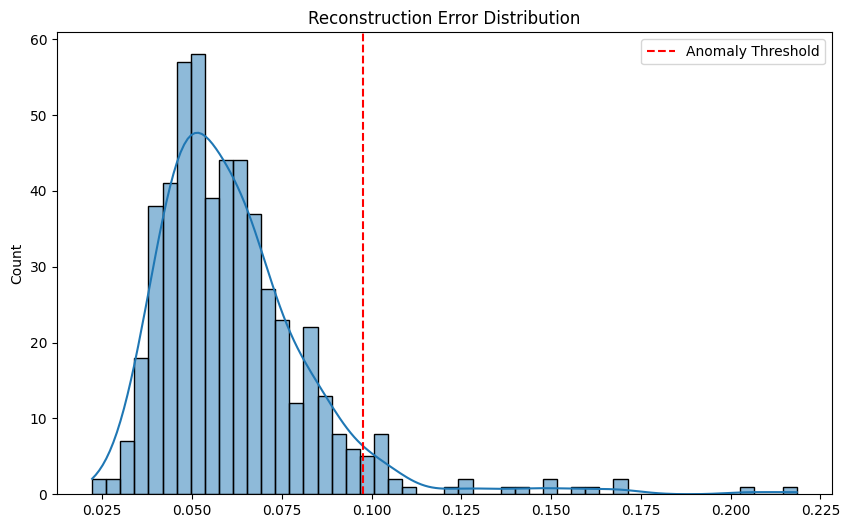

In [16]:
# Step 6: Visualization
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.axvline(thresh, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

In [17]:
# Print anomaly counts
print(f"Total Anomalies Detected: {np.sum(anomalies)}")


Total Anomalies Detected: 27
